/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:28:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271511
           1       0.99      1.00      0.99    634811

    accuracy                           1.00   1906322
   macro avg       0.99      1.00      1.00   1906322
weighted avg       1.00      1.00      1.00   1906322

ROC-AUC Score: 0.9962643752936415
Isolation Forest Report:
               precision    recall  f1-score   support

           0       0.67      0.99      0.80   1271511
           1       0.41      0.01      0.02    634811

    accuracy                           0.67   1906322
   macro avg       0.54      0.50      0.41   1906322
weighted avg       0.58      0.67      0.54   1906322

ROC-AUC Score: 0.5018594963179486


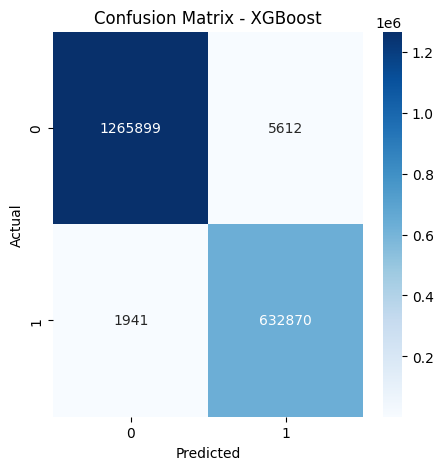

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Load dataset (Example: PaySim dataset from Kaggle)
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

# Drop or fill NaNs in target variable
df = df.dropna()  # Drop rows where target is NaN

# Preprocessing
# Selecting relevant features (modify based on dataset used)
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target = 'isFraud'
X = df[features]
y = df[target]

# Handling imbalanced data using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Supervised Learning: XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))

# Unsupervised Learning: Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso]  # Converting output to fraud labels
print("Isolation Forest Report:\n", classification_report(y_test, y_pred_iso))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_iso))

# Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()